numpy\scipy\sympy 都可以用于求解方程，可以给出数值解和解析解的结果。

# 测试scipy

In [2]:
%time
import numpy as np
from scipy.linalg import solve
#输出系数矩阵
a=np.array([[3,1,-2],[1,-1,4],[2,0,3]])
#值
b=np.array([5,-2,2.5])
#计算
x=solve(a,b)
#打印结果
print(x)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
[0.5 4.5 0.5]


# 测试sympy

In [3]:
from sympy import *
x,y= symbols('x,y')
print(x + y)

x + y


In [4]:
from sympy import *
x= symbols('x')
print(solve(x*2-4,x))

[2]


In [5]:
from sympy import *
x,y= symbols('x,y')
print(solve([2*x-y-3,3*x+y-7],[x,y]))

{x: 2, y: 1}


In [7]:
from sympy import *
x,a= symbols('x,a')
#计算多项式的结果,表达式方式的结果
result_or=solve(x**2+a**2,x)
print(result_or)
#带入数值,这里设置a=3
for temp in result_or:
    print(temp.subs([(a,3)]))


[-I*a, I*a]
-3*I
3*I


## ODE

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

In [10]:
sympy.init_printing()  #为了更好地显示来自 SymPy 的输出，我们需要初始化其屏幕打印系统：

In [11]:
t, k, T0, Ta = sympy.symbols('t, k, T_0, T_a')

In [12]:
T = sympy.Function('T')

In [13]:
ode = T(t).diff(t) + k*(T(t) - Ta)

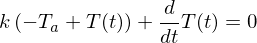

In [14]:
sympy.Eq(ode)

In [15]:
ode_sol = sympy.dsolve(ode)

In [16]:
ode_sol

$\frac{d^2x(t)}{dx^2} + 2\gamma \omega_0 \frac{dx(t)}{dt} + \omega_0^2x(t) = 0$

In [17]:
t, omega0, gamma = sympy.symbols("t, omega_0, gamma", positive=True)
x = sympy.Function('x')
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2*x(t)

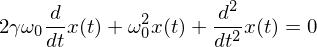

In [18]:
sympy.Eq(ode)

In [19]:
ode_sol = sympy.dsolve(ode)

In [20]:
ode_sol

## 初值问题

由于这是一个二阶 ODE，因此在通用解中有两个待定积分常数。我们需要为位置$ x(0)$ 和速度 $\frac{dx(t)}{dt}\Bigr|_{t=0}$ 指定初始条件，以便为 ODE 指定一个特解。为此，创建一个包含这些初始条件的字典，并使用 apply_ics 将其应用于 ODE 解：


In [21]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}

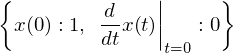

In [22]:
ics

In [25]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0, y(x).diff(x).subs(x, 0): yp0, ...},
    to the solution of the ODE with independent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """

    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
            for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)

    return sol.subs(sol_params)


In [26]:
 x_t_sol =  apply_ics(ode_sol, ics, t, [omega0, gamma])

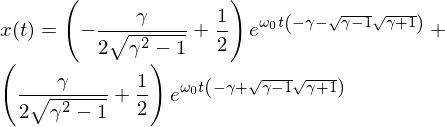

In [27]:
x_t_sol 

对于$\gamma = 1$，通常计算会产生零除法错误，所以处理的方法是在这个值范围内要，采用极限。

In [28]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)

In [29]:
x_t_critical

最后，我们绘制 ω0=2π 和阻尼比 γ 不同值的图形：

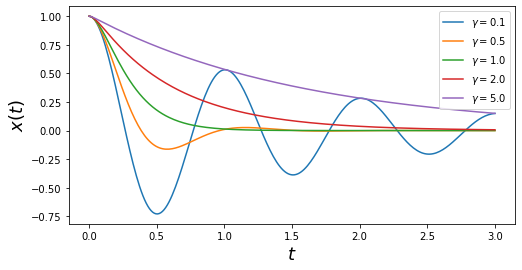

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()






# 参考文献

https://blog.csdn.net/and_w/article/details/80160033
https://blog.csdn.net/And_w/article/details/80160033
https://www.cnblogs.com/xzcfightingup/p/7598293.html
https://blog.csdn.net/meiqi0538/article/details/82990432
https://www.jianshu.com/p/339c91ae9f41
https://www.cnblogs.com/wj-1314/p/10244807.html
https://www.jianshu.com/p/b2abedd3784e
https://www.jianshu.com/p/339c91ae9f41